**Project Title:** Correlation Between North American Video Game and Criminal Statistics from 2010 - 2016

**Course**: GDAA1001

**Contributors**: Karlos Lao, Mira Rayson, Amy Stewart

**Date**: Dec 6, 2023


## Introduction:
*In the initial stages of ideation for potential datasets, our team identified a comprehensive dataset that amalgamated video game, crime, and school drop-out statistics across North America, Europe, and Japan. However, the inconsistency and interpretative challenges arising from the lack of metadata in the crime and school statistics prompted us to seek a more reliable crime-related dataset. Consequently, we opted for the United Nations database on international crime statistics, specifically filtered for violent offense counts, and supplemented the analysis with population data from the US Census International Database for normalization purposes. Refining our focus, we shifted from the initial consideration of video game genre as the target variable to crime rate, recognizing its greater utility as a predictor. Furthermore, the decision to exclude Japan from our analysis was informed by the observation of stagnant statistics. The initial choice of the 2005-2016 year range for data consistency underwent revision along with a refined focus solely on Europe and North America.*

*The datasets and their sources are listed below:*
*   [Population Data, from US Census](https://www.census.gov/data-tools/demo/idb/#/table?COUNTRY_YEAR=2023&COUNTRY_YR_ANIM=2023&CCODE_SINGLE=*M&CCODE=*M,*W,MX&menu=tableViz&quickReports=CUSTOM&CUSTOM_COLS=POP&TABLE_RANGE=2005,2017&TABLE_YEARS=2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017&TABLE_USE_RANGE=Y&TABLE_USE_YEARS=N&TABLE_STEP=1)
*   [Games Statistics, from Kaggle](https://www.kaggle.com/datasets/gautamshah2002/video-game-crime-dropout-dataset/data )
*   [Crime Data, from UN](https://dataunodc.un.org/dp-crime-violent-offences)

**Goals:**
- *Create a model to predict crime rate based on a given number of gaming statistics.*

**Predictors:**
*   *Genre (categorical)*

*   *Sales Per Thousand People (numerical)*

*   *Critic Score (numerical)*

*   *User Score (numerical)*

*   *Game Type (categorical)*

*   *Game Platform (categorical)*


**Target Variable:**
*   *Crime Rate (categorical)*

## Load Libraries
*This section loads all the required libraries.*

In [ ]:
### New packages that are not within Colab's local runtime ###
required_packages <- c("GGally", "caret", "ggcorrplot", "randomForest")

### check with the list of installed packages
### if not installed, install the packages in the list above
install.packages(setdiff(required_packages, rownames(installed.packages())))
lapply(required_packages, require, character.only = TRUE)

### libraries for data manipulation ###
library(tidyverse)
library(dplyr)  # we use mostly dplyr to keep consistency in codes
library(readr)

### library for variable co-variation (pairwise correlation matrix) ###
library(ggcorrplot)

### libraries for Machine Learning ###
library(caret)
library(randomForest)

### libraries for visualization ###
library(ggplot2)
library(GGally)
library(RColorBrewer)

# Check built-in packages on Colab's site-library
#library()

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘labelled’, ‘prodlim’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘ggstats’, ‘plyr’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: GGally

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: caret

Loading required package: lattice

Loading required package: ggcorrplot

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()       masks randomForest::combine()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::lift()          masks caret::lift()
✖ randomForest::margin() masks ggplot2::margin()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Original Data Sources
*This section contains all the original data sources and links to where the csv data are hosted on GitHub.*

In [ ]:
# Original Data
raw_games <- read_csv ('https://raw.githubusercontent.com/karloslao/GDAA1001/main/games.csv', show_col_types = FALSE)
metadata <- read_csv ('https://raw.githubusercontent.com/karloslao/GDAA1001/main/metadata.csv', show_col_types = FALSE)

In [ ]:
raw_games

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61,45,6.3,106,Good Science Studio,E
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,E
Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91,64,8.6,464,Nintendo,E
Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87,89,6.3,1454,Treyarch,M


In [ ]:
metadata

Variable,Description
<chr>,<chr>
Platform,Name of the Platform the game is played on
Year of release,The year it was released
Genre,Different type of game
Publisher,Publishing company of the game
NA Sales,Sale of the specific game in Northern America (in million)
EU Sales,Sale of the specific game in Europe (in million)
JP Sales,Sale of the specific game in Japan (in million)
Other Sales,Sale of the specific game in other parts of the world (in million)
Global Sales,Total sale of the specific game globally (in million)


## Data Preparation
*In this section, the original datasets are imported, cleaned, and aggregated into a cohesive tidy dataframe. Feedback and insights garnered from the exploratory data analysis (EDA) prompted adjustments, including the exclusion of EU Data and constraining the year range to 2010-2016. Statistical methods and feature engineering techniques were also used, for example, data values were normalized to ensure a standardized scale. The raw crime data was transformed into crime rates by using population. Notably, Bayesian Averages were implemented to establish a consistent and comparable rating system, addressing variations between critic and user ratings, which allow us to combine score and count together to create two of the most important predictors - critic score and user score.*

#### Assessing Data Quality and Identify Potential Predictor Variables

In [ ]:
# To use platform as a predictor, 3 potential variables can be used:
# [Platform, Publisher, Developer]
# "Name" is too "refined" to find patterns

# publisher <- raw_games %>%
#   group_by(Publisher) %>%
#   summarize(Count = n())
# publisher

# developer <- raw_games %>%
#   group_by(Developer) %>%
#   summarize(Count = n())
# developer

# Platform is the best among the three
# The names of the platforms are very consistent
# Even though PS2, PS3, PS4 may be re-defined as PS (playstation)
platform <- raw_games %>%
  group_by(Platform) %>%
  summarize(Count = n())

# check the game types
Rating <- raw_games %>%
  group_by(Rating) %>%
  summarize(Count = n())

# Observation: we should drop "AO", "EC", "K-A" and "RP" due to limited number

####Population Data Preparation

In [ ]:
# Get population data, and don't show column types
# The population data will be used as a scaling factor for variables with raw counts
pop_data <- read_csv ('https://raw.githubusercontent.com/mirarayson/GDAA_Group_Project/main/IDB_pop_data.csv', show_col_types = FALSE)

# Some data cleaning
pop_df <- pop_data %>%
  # Subset the columns to exclude empty columns
  subset(select = c('Name','Region', 'Year', 'Population')) %>%
  # Limit year range to 2010-2016
  filter(Year >= 2010, Year <= 2016) %>%
  # Filter rows based on the 'Name' column
  filter(Name %in% c("Total NA Pop.", "Total EU Pop.")) %>%
  # Remove column "Name"
  select(-Name) %>%
  # Re-arrange the data
  pivot_wider(names_from = "Region", values_from = "Population") %>%
  rename(EU_Pop = "Europe", NA_Pop = "Northern America")

# Pivot the data into a tidy df
pop_df <- pop_df %>%
  pivot_longer(cols = c(EU_Pop, NA_Pop),
               names_to = "Region",
               values_to = "POP") %>%
  mutate(Region = str_replace(Region, "NA_Pop", "NA")) %>%
  mutate(Region = str_replace(Region, "EU_Pop", "EU"))

New names:
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`


#### Crime Data Preparation

Get Crime Rate for EU and NA

In [ ]:
# Read from directory, and don't show column types
crime_data <- read_csv ('https://raw.githubusercontent.com/mirarayson/GDAA_Group_Project/main/un_crime_2003_17.csv', show_col_types = FALSE)

# Some data cleaning
crime_data <- crime_data %>%
  # subset by variables of interest
  subset(select = c("Country", "Region", "Category", "Year", "VALUE")) %>%
  # Limit year range to 2010-2016
  filter(Year >= 2010, Year <= 2016) %>%
  # Group and summarize the data into [Region, Year, Violent_Offence_Count]
  group_by(Region, Year) %>%
  summarise(Violent_Offence_Count = sum(VALUE))

# More cleaning
crime_data <- crime_data %>%
  # Convert the observations into variables ["Europe", "Northern America"]
  filter(Region %in% c("Europe", "Northern America")) %>%
  pivot_wider(names_from = Region, values_from = Violent_Offence_Count) %>%
  rename("EU_Crime" = "Europe", "NA_Crime" = "Northern America")

# Pivot the data into a tidy df
crime_data <- crime_data %>%
  pivot_longer(cols = c(EU_Crime, NA_Crime),
               names_to = "Region",
               values_to = "Crime") %>%
  mutate(Region = str_replace(Region, "EU_Crime", "NA")) %>%
  mutate(Region = str_replace(Region, "NA_Crime", "EU"))

# Normalize the raw count of crime by population
crime_data <- crime_data %>%
  # merge population data into the crime df
  merge(pop_df, by = c("Year", "Region")) %>%
  # calculate crime rate using population
  mutate(Crime_RT = Crime/POP) %>%
  # select only the variables of interest
  select(Year, Region, Crime_RT)

head(crime_data)

`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.


,Year,Region,Crime_RT
,<dbl>,<chr>,<dbl>
1,2010,EU,0.001698914
2,2010,NA,0.003242344
3,2011,EU,0.001639645
4,2011,NA,0.003122783
5,2012,EU,0.001655875
6,2012,NA,0.003032970


Get Global Crime Rate Avg

In [ ]:
# Get global crime rate to convert the numeric values into factors (categorical)
global_crime_data <- read_csv('https://raw.githubusercontent.com/karloslao/GDAA1001/main/global_crime.csv', show_col_types = FALSE)
global_pop_data <- read_csv('https://raw.githubusercontent.com/karloslao/GDAA1001/main/global_pop.csv', show_col_types = FALSE)

# Some data cleaning
global_crime <- global_crime_data %>%
  # subset by variables of interest
  subset(select = c("Country", "Region", "Category", "Year", "VALUE")) %>%
  # Limit year range to 2010-2016
  filter(Year >= 2010, Year <= 2016) %>%
  # Group and summarize the data into [Region, Year, Violent_Offence_Count]
  group_by(Year) %>%
  summarise(Crime = sum(VALUE))

# Normalize the raw count of crime by population
global_crime_rate <- global_crime %>%
  # merge population data into the crime df
  merge(global_pop_data, by = "Year" )%>%
  # calculate crime rate using population
  mutate(Global_Crime_RT = (Crime/Population))%>%
  # select only the variables of interest
  select(Year, Global_Crime_RT)

head(global_crime_rate)

,Year,Global_Crime_RT
,<dbl>,<dbl>
1,2010,0.0007809032
2,2011,0.0007647293
3,2012,0.0007375205
4,2013,0.0007469082
5,2014,0.0007809741
6,2015,0.0007946490


Using the Global Average to Re-Scale Crime Rates for EU and NA

( this ensures both values are adjusted to a relative scale)

In [ ]:
# Normalize the raw count of crime by population continued
scaled_crime <- crime_data %>%
  # merge global data
  merge(global_crime_rate, by = "Year" ) %>%
  # re-scaling crime rate for EU and NA using the global average
  mutate(norm_Crime_RT = round((Crime_RT/Global_Crime_RT), digits =2)) %>%
  # select only the variables of interest
  select(Year, Region, norm_Crime_RT)
# The normalized crime rate shows how EU or NA compares to global average from year to year
# e.g. 3 means 3 times higher than the global average


# Convert the normalized crime rate into categories (factors)
crime_df <- scaled_crime %>%
  # re-scaling crime rate for EU and NA using the global average
  mutate(norm_Crime_RT = round(norm_Crime_RT)) %>%
  # rename and convert into factors
  mutate(norm_Crime_RT = factor(norm_Crime_RT)) %>%
  rename (Crime_RT = norm_Crime_RT)
head(crime_df)


,Year,Region,Crime_RT
,<dbl>,<chr>,<fct>
1,2010,EU,2
2,2010,NA,4
3,2011,EU,2
4,2011,NA,4
5,2012,EU,2
6,2012,NA,4


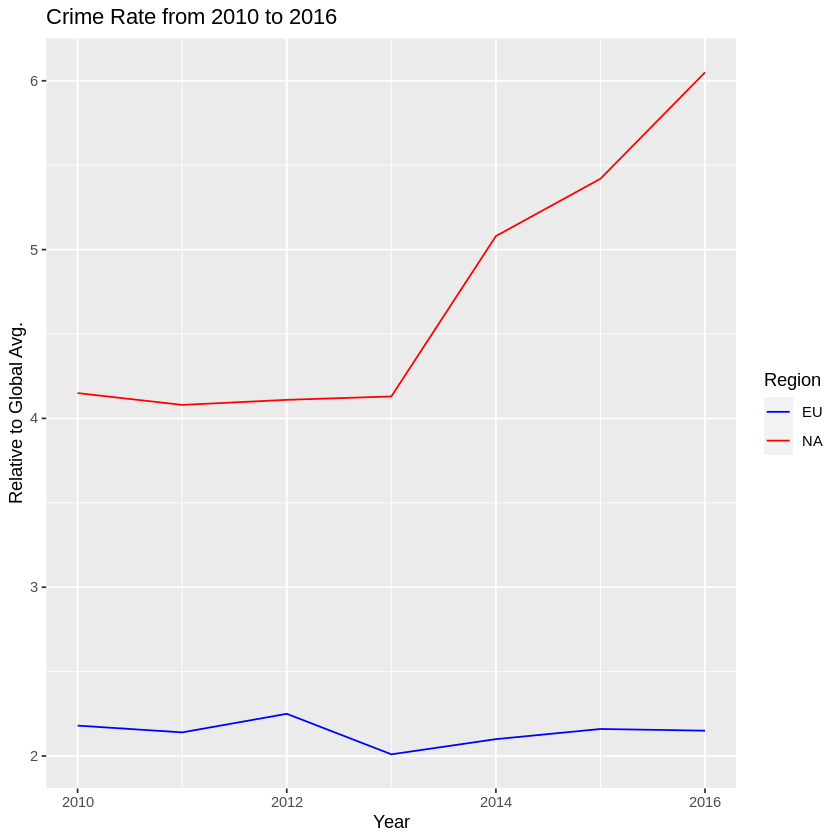

In [ ]:
# Visualize and compare their crime profiles
crime_comparison <- ggplot(scaled_crime, aes(x = Year, y = norm_Crime_RT, color = Region)) +
  geom_line() +
  labs(title = "Crime Rate from 2010 to 2016",
       x = "Year",
       y = "Relative to Global Avg.") +
  scale_color_manual(values = c("EU" = "blue", "NA" = "red"))
crime_comparison

**Observation:**
*   EU's crime rate shows almost no change within the past 12 years
*   We should drop EU's data because NA's crime profile is drastically different(or alternatively, we should create two different models separately with the two datasets)

#### Game Data Preparation

In [ ]:
# Read from directory, and don't show column types
game_data <- read_csv ('https://raw.githubusercontent.com/mirarayson/GDAA_Group_Project/main/games.csv', show_col_types = FALSE)

# some data cleaning
game_df <- game_data %>%
  subset(select = c("Platform","Year_of_Release", "Genre", "NA_Sales",
                    "EU_Sales", "Critic_Score", "Critic_Count",
                    "User_Score", "User_Count","Rating")) %>%
  # Limit year range to 2010-2016
  filter(Year_of_Release >= 2010, Year_of_Release <= 2016) %>%
  #drop observations containing any null values
  na.omit() %>%
  # clean up "Sales", remove any observations with 0
  filter(NA_Sales != 0 | EU_Sales != 0) %>%
  # drop observations with the following game type: ('RP', 'AO', 'EC', 'K-A')
  filter(!(Rating %in% c('RP', 'AO', 'EC', 'K-A'))) %>%
  # convert the data type of "user_score" from chr to numeric
  mutate("User_Score" = as.numeric(User_Score)) %>%
  # rename variables for analysis
  rename(Year = Year_of_Release, GM_Type = Rating)

# Tidy the data by pivotting
game_df <- game_df %>%
  pivot_longer(cols = c(NA_Sales, EU_Sales),
               names_to = "Region",
               values_to = "Sales") %>%
  mutate(Region = str_replace(Region, "NA_Sales", "NA")) %>%
  mutate(Region = str_replace(Region, "EU_Sales", "EU")) %>%
  # sales data was originally recorded in million
  mutate(Sales = Sales * 1000000)

# merge with population data to get sales per 1000 people (Sales_PTP)
game_df <- game_df %>%
  merge(pop_df, by = c("Year", "Region")) %>%
  # the raw count is too small, scale up the value by 1000
  # to represent sales of games per 1000 people instead
  mutate(Sales_PTP = round((Sales/POP*1000), digits =2))

## drop EU data (EU and NA have a very different crime profile)
# This gives us a tibble: 7404 × 9
# convert from tibble to df
game_df <- as.data.frame(game_df) %>%
  # remove the extra variable
  select (-Sales, -POP) %>%
  # convert some of the predictor variables into categorical data
  mutate(Genre = factor(Genre)) %>%
  mutate(GM_Type = factor(GM_Type)) %>%
  mutate(Platform = factor(Platform))

head(game_df)

,Year,Region,Platform,Genre,Critic_Score,Critic_Count,User_Score,User_Count,GM_Type,Sales_PTP
,<dbl>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,2010,EU,PSP,Action,70,14,8.1,46,M,0.04
2,2010,EU,X360,Sports,68,21,5.4,9,E,0.22
3,2010,EU,PC,Shooter,72,26,6.4,516,M,0.31
4,2010,EU,X360,Shooter,58,52,6.1,24,T,0.09
5,2010,EU,PC,Action,54,7,6.8,9,E,0.01
6,2010,EU,PS3,Racing,70,42,5.4,28,E,0.18


#### Normalize Critic Rating and User Score with Bayesian Average

In [ ]:
# source: https://www.algolia.com/doc/guides/managing-results/must-do/custom-ranking/how-to/bayesian-average/

# Define a smoothing factor to avoid division by zero
sf <- 3

# Calculate the overall average for Critic_Score and User_Score
critic_m <- mean(game_df$Critic_Score)
user_m <- mean(game_df$User_Score)

# Calculate Bayesian Averages for both variables
game_df <- game_df %>%
  mutate(CRITIC_SCORE = (Critic_Count * critic_m + Critic_Score * sf) / (Critic_Count + sf)) %>%
  mutate(USER_SCORE = (User_Count * user_m + User_Score * sf) / (User_Count + sf)) %>%
  # these variables are no longer needed
  select(-Critic_Score, -Critic_Count, -User_Score, -User_Count)

In [ ]:
# Check their range

# Critic Score value ranges from 45-80
max(game_df$CRITIC_SCORE)
min(game_df$CRITIC_SCORE)

# User Score value ranges from 4-8
max(game_df$USER_SCORE)
min(game_df$USER_SCORE)


[1] 80.58412

[1] 46.2984

[1] 7.707518

[1] 4.064661

#### Combining Population, Crime, and Games

In [ ]:
pop_crime <- merge(pop_df, crime_df, by = c("Year","Region"))
pop_crime_game <- merge(pop_crime, game_df, by = c("Year","Region"))

# North America Data
na_df <- pop_crime_game %>%
  filter(Region == "NA") %>%
  arrange(desc(Sales_PTP)) %>%
  select (POP, Crime_RT, Platform, Genre, GM_Type, Sales_PTP, CRITIC_SCORE, USER_SCORE) %>%
  # rename the variables for better clarity
  rename(POPULATION = POP, CRIME_RT = Crime_RT, PLATFORM = Platform,
         GENRE = Genre, GM_TYPE = GM_Type, SALES_PTP = Sales_PTP)


# Europe Data
eu_df <- pop_crime_game %>%
  filter(Region == "EU") %>%
  arrange(desc(Sales_PTP)) %>%
  select (POP, Crime_RT, Platform, Genre, GM_Type, Sales_PTP, CRITIC_SCORE, USER_SCORE) %>%
  # rename the variables for better clarity
  rename(POPULATION = POP, CRIME_RT = Crime_RT, PLATFORM = Platform,
         GENRE = Genre, GM_TYPE = GM_Type, SALES_PTP = Sales_PTP)

na_df

POPULATION,CRIME_RT,PLATFORM,GENRE,GM_TYPE,SALES_PTP,CRITIC_SCORE,USER_SCORE
<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
457818445,4,X360,Misc,E,32.76,70.63019,6.726097
457818445,4,X360,Shooter,M,21.19,71.78507,6.737254
470745079,4,X360,Action,M,20.52,72.53751,6.739257
462178947,4,X360,Shooter,M,19.56,71.86963,6.737008
466548408,4,X360,Shooter,M,17.68,71.73515,6.735583
457818445,4,X360,Shooter,M,15.38,71.85244,6.739859
470745079,4,PS3,Action,M,14.91,72.72850,6.739254
470745079,4,X360,Shooter,M,14.30,71.43419,6.732301
466548408,4,X360,Shooter,M,14.25,71.79647,6.738397


## Exploratory Data Analysis
*This section uses descriptive statistics and graphs to help us gain more insights from the dataset. This involves scrutinizing outliers, exploring data distribution, and assessing variation and covariation among variables. This iterative approach aids in deepening our comprehension of the data and allows for adjustments to the data preparation section as needed. The end result of this process is a well-organized and comprehensively understood dataframe,  that is ready for data modelling.*


#### Identify variation within the predictors

In [ ]:
# A snapshot of all variables
# note that the quantity of different classes is not balanced
# and some transformation are needed
summary(na_df)

   POPULATION        CRIME_RT    PLATFORM            GENRE     GM_TYPE   
 Min.   :457818445   2:   0   PS3    :440   Action      :649   E   :450  
 1st Qu.:462178947   4:1438   X360   :415   Shooter     :291   E10+:367  
 Median :466548408   5: 444   PC     :317   Sports      :237   M   :652  
 Mean   :468202893   6: 212   PS4    :235   Role-Playing:236   T   :625  
 3rd Qu.:474956227            XOne   :159   Racing      :135             
 Max.   :483123818            3DS    :148   Misc        :122             
                              (Other):380   (Other)     :424             
   SALES_PTP        CRITIC_SCORE     USER_SCORE   
 Min.   : 0.0000   Min.   :46.30   Min.   :4.065  
 1st Qu.: 0.1100   1st Qu.:70.38   1st Qu.:6.714  
 Median : 0.3200   Median :71.49   Median :6.741  
 Mean   : 0.8606   Mean   :70.85   Mean   :6.713  
 3rd Qu.: 0.8475   3rd Qu.:71.99   3rd Qu.:6.766  
 Max.   :32.7600   Max.   :80.58   Max.   :7.708  
                                                  

#### Check Variation within Numeric Variables:
*   SALES_PTP: sales of game per thousands of people
*   CRITIC_SCORE: game rating given by professional critics (i.e. verified reviews)
*   USER_SCORE: game rating given by casual game users




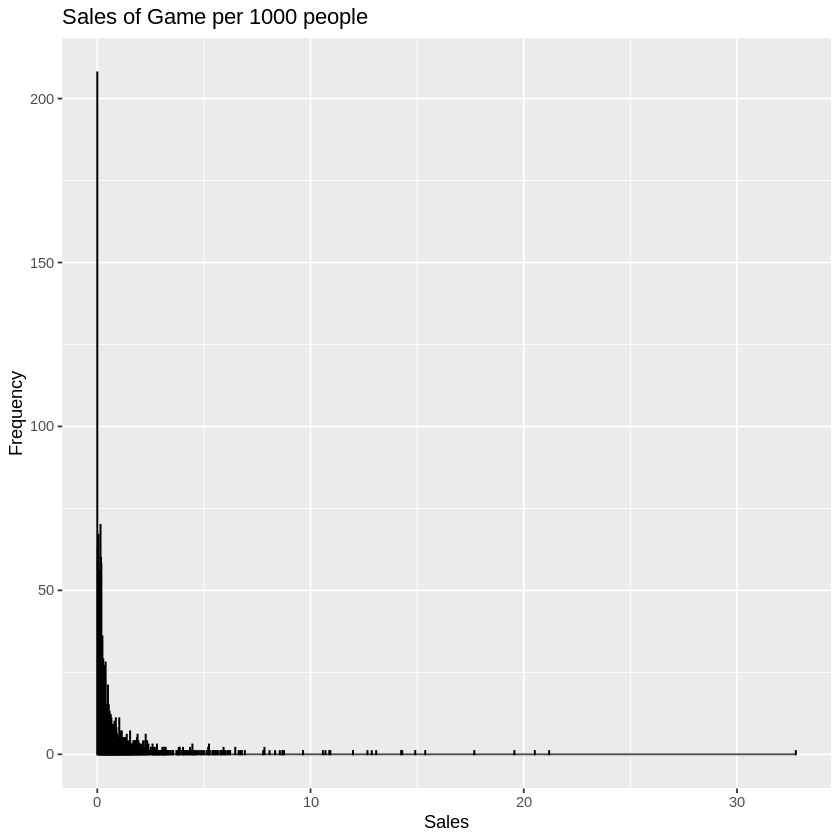

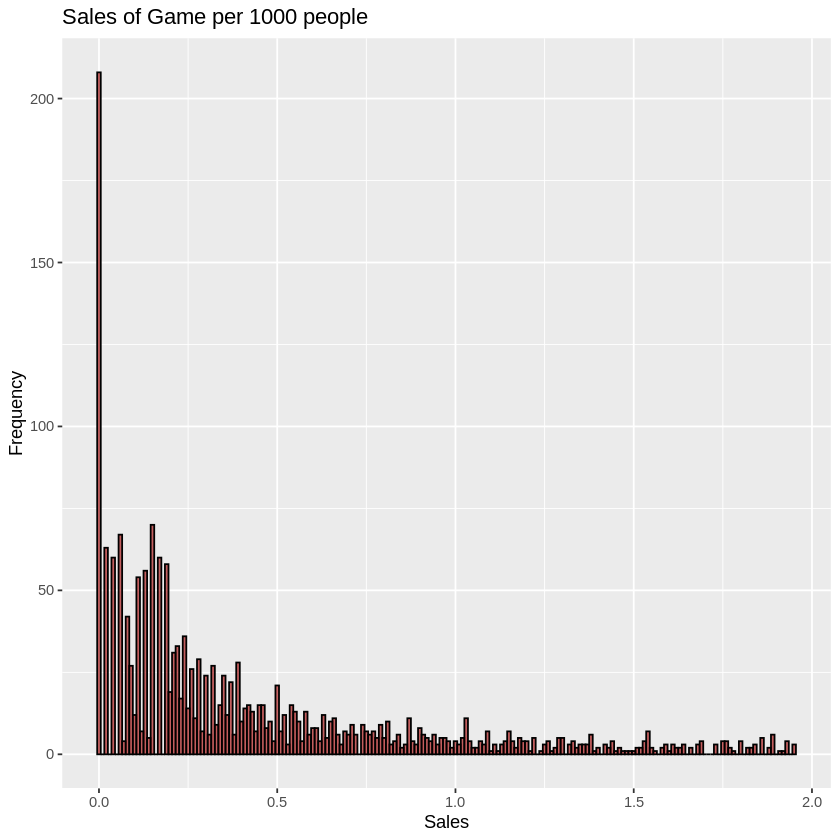

In [ ]:
######### Check the distribution of "SALES_PTP" ##########
Sales_PTP <-ggplot(na_df, aes(x = SALES_PTP)) +
  geom_histogram(binwidth = 0.01, fill = "firebrick", color = "black", alpha = 0.7) +
  labs(title = "Sales of Game per 1000 people",
       x = "Sales",
       y = "Frequency")

Sales_PTP
# The data is very negatively skewed,
# we need to remove outliers based on a 1.5 IQR threshold
quartiles <- quantile(na_df$SALES_PTP, probs = c(0.25, 0.75), na.rm = TRUE)
IQR <- IQR(na_df$SALES_PTP)
Lower <- quartiles[1] - 1.5 *IQR
Upper <- quartiles[2] + 1.5 *IQR
na_df <- na_df %>%
  filter(SALES_PTP> Lower & SALES_PTP < Upper)

# check the distribution again
Sales_PTP_new <-ggplot(na_df, aes(x = SALES_PTP)) +
  geom_histogram(binwidth = 0.01, fill = "firebrick", color = "black", alpha = 0.7) +
  labs(title = "Sales of Game per 1000 people",
       x = "Sales",
       y = "Frequency")

# Confirm the range of SALES_PTP again
Sales_PTP_new

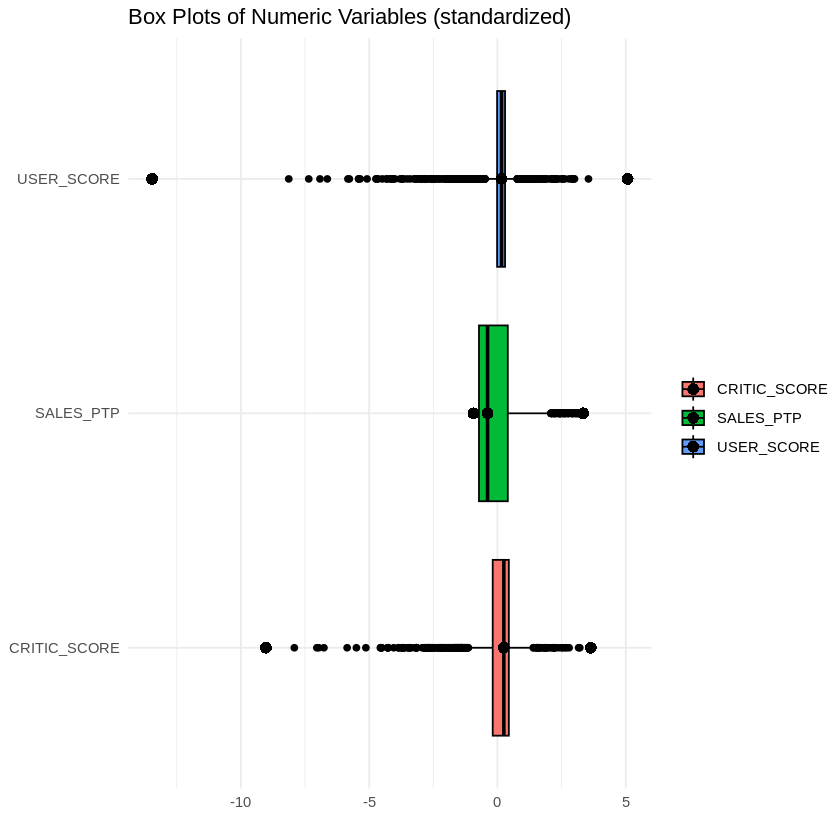

In [ ]:
# Use a boxplot to compare variations in our numeric variables
box_plot_df <- na_df %>%
  # Rescale variables using z-score so that they can be on the same x-axis
  mutate(across(c(6:8), ~ as.vector(scale(.)), .names = "{.col}_z")) %>%
  select(c(2:5, 9:11)) %>%
  # Rename the new columns to remove "_z"
  rename("SALES_PTP" = "SALES_PTP_z", "CRITIC_SCORE" = "CRITIC_SCORE_z", "USER_SCORE" = "USER_SCORE_z") %>%
  # Reshape data into long format
  gather(key = "Variable", value = "Value", SALES_PTP, CRITIC_SCORE, USER_SCORE) %>%
  # Create a horizontal boxplot
  ggplot(aes(x = Variable, y = Value, fill = Variable)) +
  geom_boxplot(color = "black") +
  stat_summary(fun = "median", geom = "point", shape = 16, size = 3, color = "black") +
  stat_summary(fun = "max", geom = "point", shape = 16, size = 3, color = "black") +
  stat_summary(fun = "min", geom = "point", shape = 16, size = 3, color = "black") +
  labs(title = "Box Plots of Numeric Variables (standardized)",
       x = NULL,
       y = " ") +
  theme_minimal() +
  theme(legend.title = element_blank()) +
  coord_flip()

print(box_plot_df)

Warning message:
“Removed 3 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


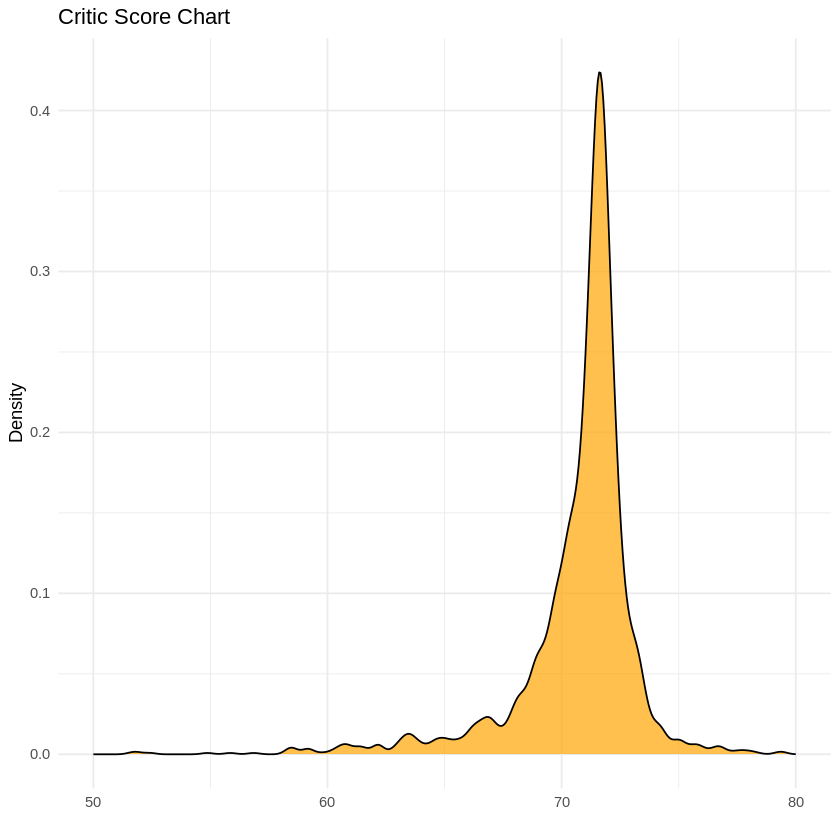

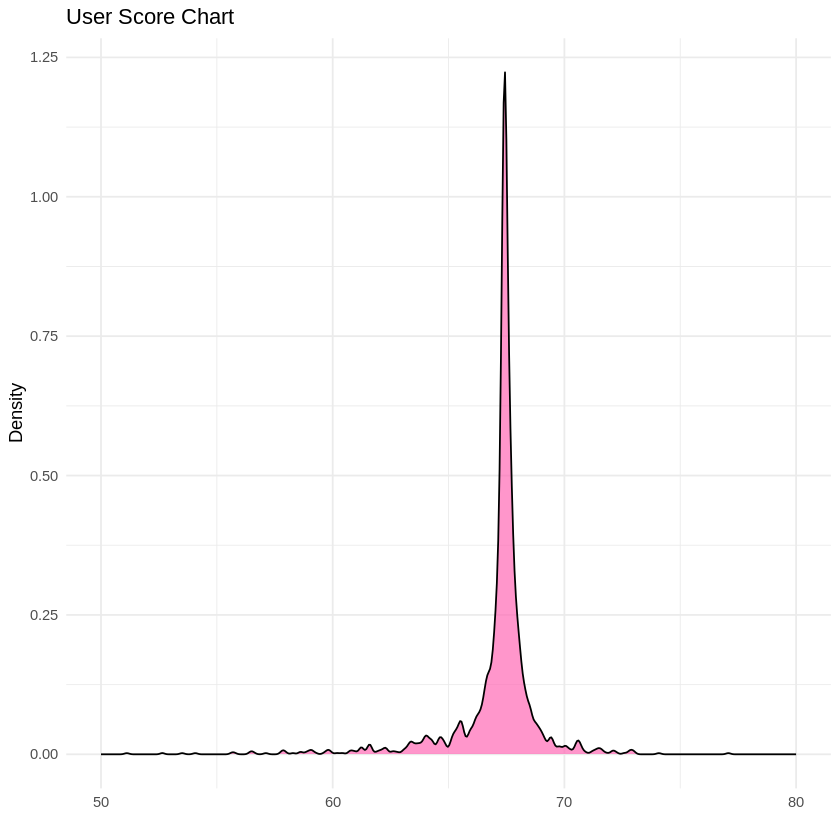

In [ ]:
# user score has a scale of 0-10
# critic score has a scale of 0-100
# we need to scale up the values of user score to make a consistent scale
critic_user_df <- na_df %>%
  mutate (USER_SCORE = USER_SCORE * 10)

# Use a density plot to check for Critic Score
critic_dens <- ggplot(critic_user_df, aes(x = CRITIC_SCORE)) +
  geom_density(fill = "orange", color = "black", alpha = 0.7) +
  labs(title = "Critic Score Chart", x = " ", y = "Density") +
  theme_minimal() +
  xlim(50, 80)  # Set x-axis limits, zoom into the 50-80 range
critic_dens

#  Use a density plot to check for user score
user_dens <- ggplot(critic_user_df, aes(x = USER_SCORE)) +
  geom_density(fill = "hotpink", color = "black", alpha = 0.7) +
  labs(title = "User Score Chart", x = " ", y = "Density") +
  theme_minimal()+
  xlim(50, 80)  # Set x-axis limits, zoom into the 50-80 range
user_dens

####Check Variation within Categorical Variables
*   CRIME_RT: a standardized crime rate derived from counts of crime divided by regional population, using global average crime and population as a scaling factor
*   PLATFORM: where the game is hosted and consumed by game users
*   GENRE: the overall theme and style of the game.
*   GM_TYPE: the classification in which the game was assigned to provide information about its suitability for different audiences.




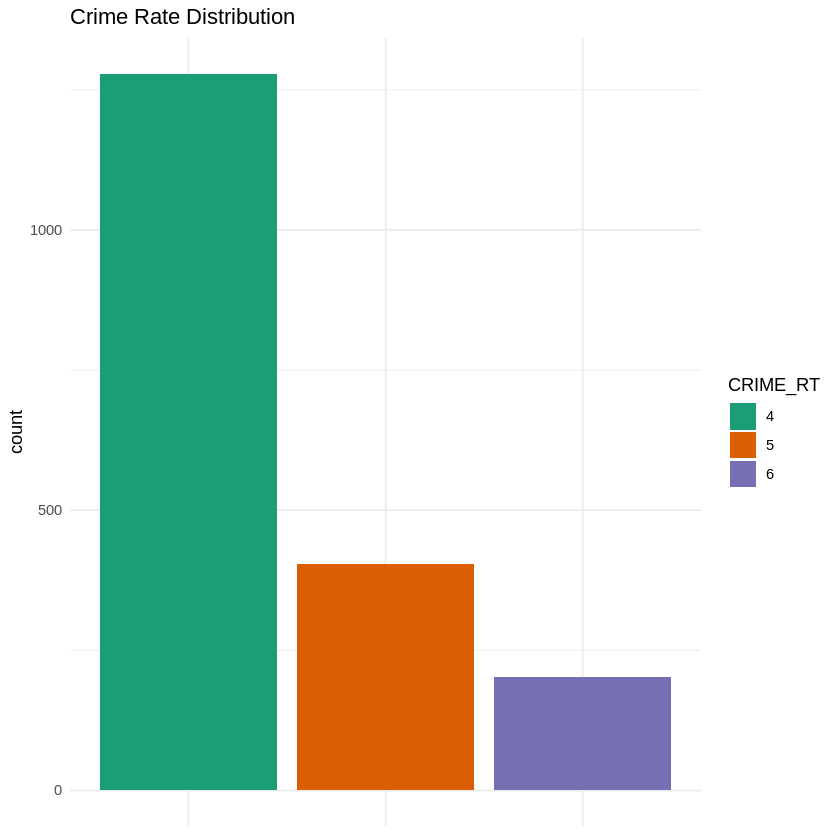

In [ ]:
# Use a bar plot to check for distribution in Crime Rate
crime_chart <- ggplot(na_df, aes(x = CRIME_RT, fill = CRIME_RT)) +
  geom_bar() +
  scale_fill_brewer(palette = "Dark2") +
  labs(title = "Crime Rate Distribution", x = "CRIME_RT") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank())
crime_chart

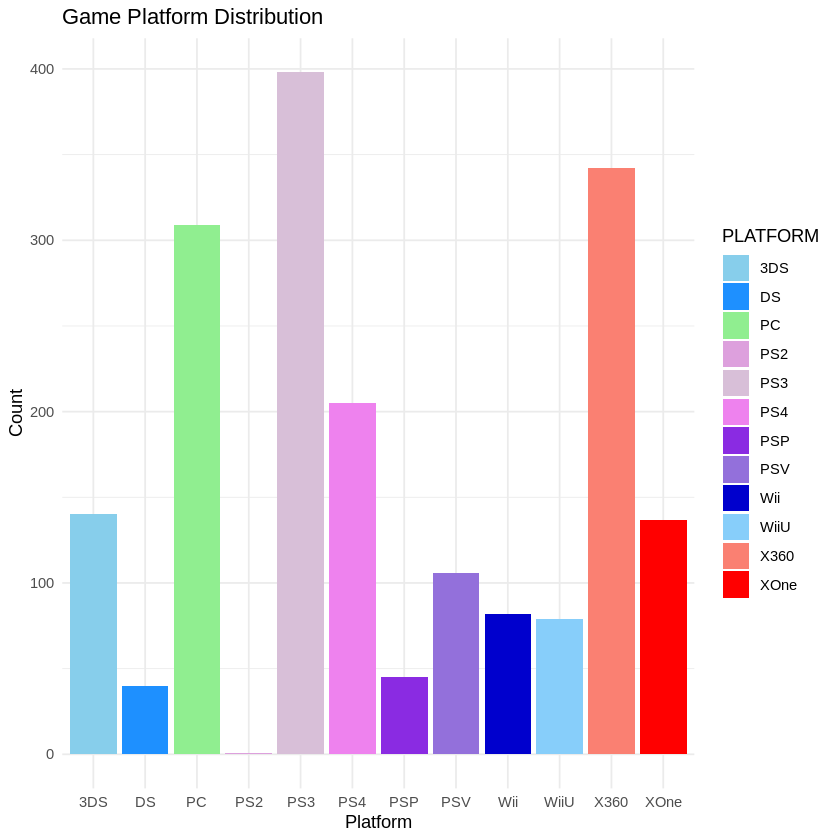

In [ ]:
# Use a bar chart to check for distribution in game platforms

# Custom color mapping based on console companies
# Nintendo: blues, Sony: purples, Microsoft: reds
color_params <- c("3DS" = "skyblue",
                    "DS" = "dodgerblue",
                    "GBA" = "navy",
                    "GC" = "cornflowerblue",
                    "PC" = "lightgreen",
                    "PS2" = "plum",
                    "PS3" = "thistle",
                    "PS4" = "violet",
                    "PSP" = "blueviolet",
                    "PSV" = "mediumpurple",
                    "Wii" = "mediumblue",
                    "WiiU" = "lightskyblue",
                    "X360" = "salmon",
                    "XB" = "indianred",
                    "XOne" = "red")

# Bar chart for Platform
platform_chart <- ggplot(na_df, aes(x = PLATFORM, fill = PLATFORM)) +
  geom_bar() +
  scale_fill_manual(values = color_params) +
  labs(title = "Game Platform Distribution", x = "Platform", y = "Count") +
  theme_minimal()
platform_chart

#### Check for covariation between variables

Explore Genre and Sales per thousand people using a histogram

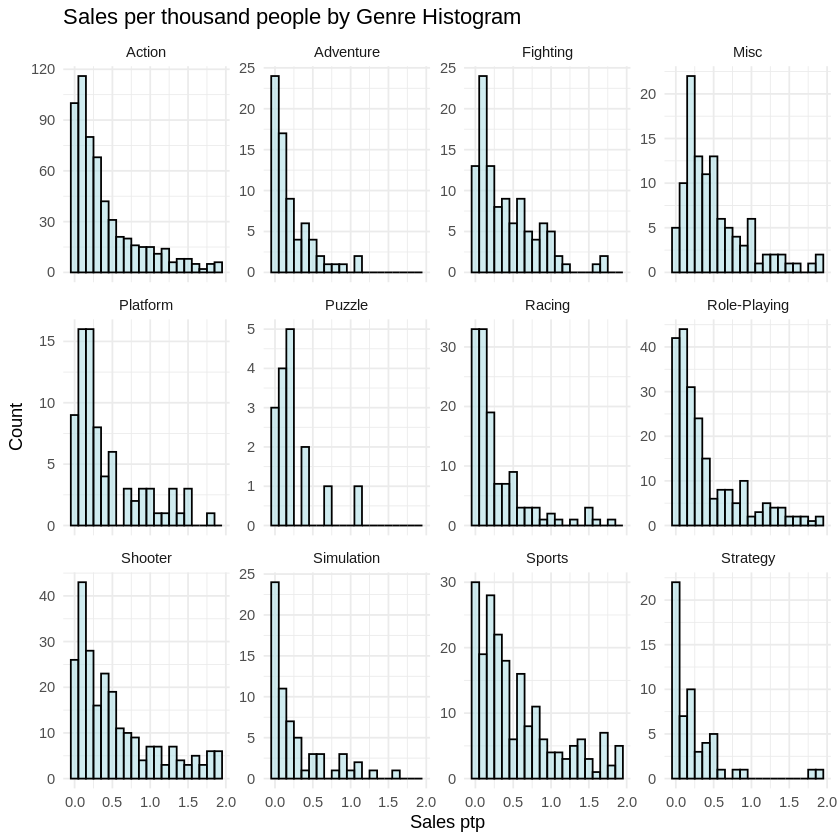

In [ ]:
# Use a histogram to check between "Genre" and "Sales per Thousand People"

# use facet_wrap function to create 12 unique histograms.
genre_sales_ptp <- ggplot(na_df, aes(x = SALES_PTP)) +
  geom_histogram(binwidth = 0.1, fill = "powderblue", color = "black", alpha = 0.6) +
  facet_wrap(~ GENRE, scales = "free_y") +
  labs(title = "Sales per thousand people by Genre Histogram",
        x = "Sales ptp",
        y = "Count") +
theme_minimal()
genre_sales_ptp

Compare Crime rates and Population by region on a uniform scale using a line plot

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


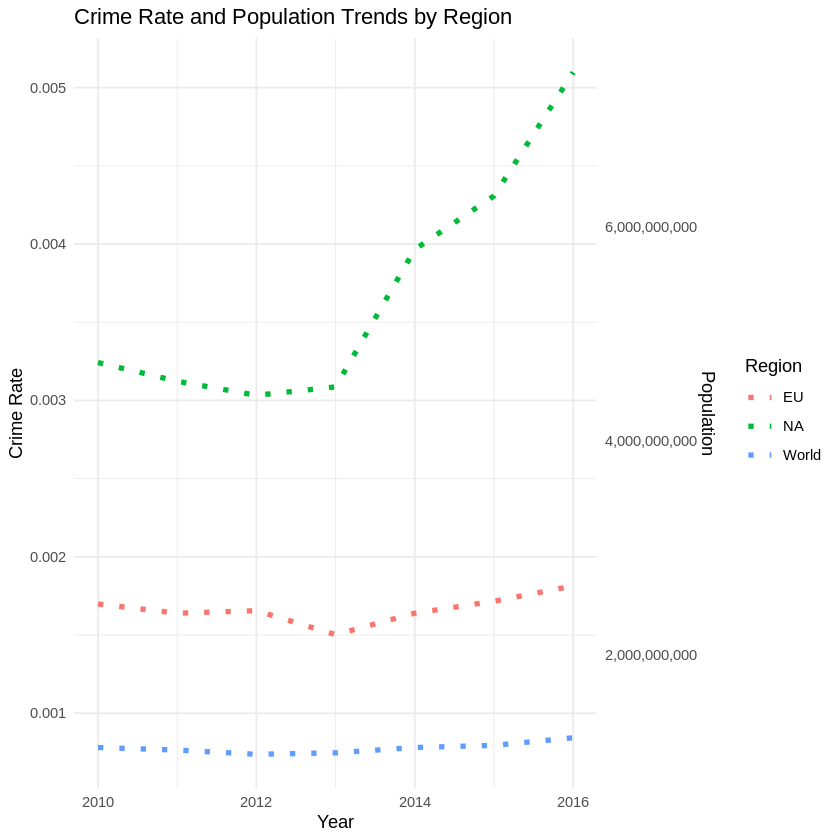

In [ ]:
# Get a separate df for visualization
# Europe and North America
na_eu_merged_df <- merge(crime_data, pop_df, by = c("Year", "Region"))

# Global
global_pop_crime <- global_pop_data %>%
  merge(global_crime, by = "Year") %>%
  mutate (Crime_RT = Crime/Population) %>%
  rename (POP = Population) %>%
  select (-Crime)

# Combine tables using bind_rows
regional_pop_crime <- bind_rows(na_eu_merged_df, global_pop_crime)

# Create a line chart for population and crime
pop_crime_chart <- ggplot(regional_pop_crime, aes(x = Year)) +
  geom_line(aes(y = Crime_RT, color = Region, linetype = Region), size = 1.5) +
  labs(title = "Crime Rate and Population Trends by Region",
       x = "Year",
       y = "Crime Rate") +
  scale_y_continuous(sec.axis = sec_axis(~. * max(regional_pop_crime$POP) / max(regional_pop_crime$Crime_RT),
                                         name = "Population", labels = scales::comma)) +
  scale_linetype_manual(name = "Region", values = c("EU" = "dotted", "NA" = "dotted", "World" = "dotted"),
                        breaks = c("EU", "NA", "World")) +
  theme_minimal()
pop_crime_chart

Compare User Score and Platform using a scatter plot

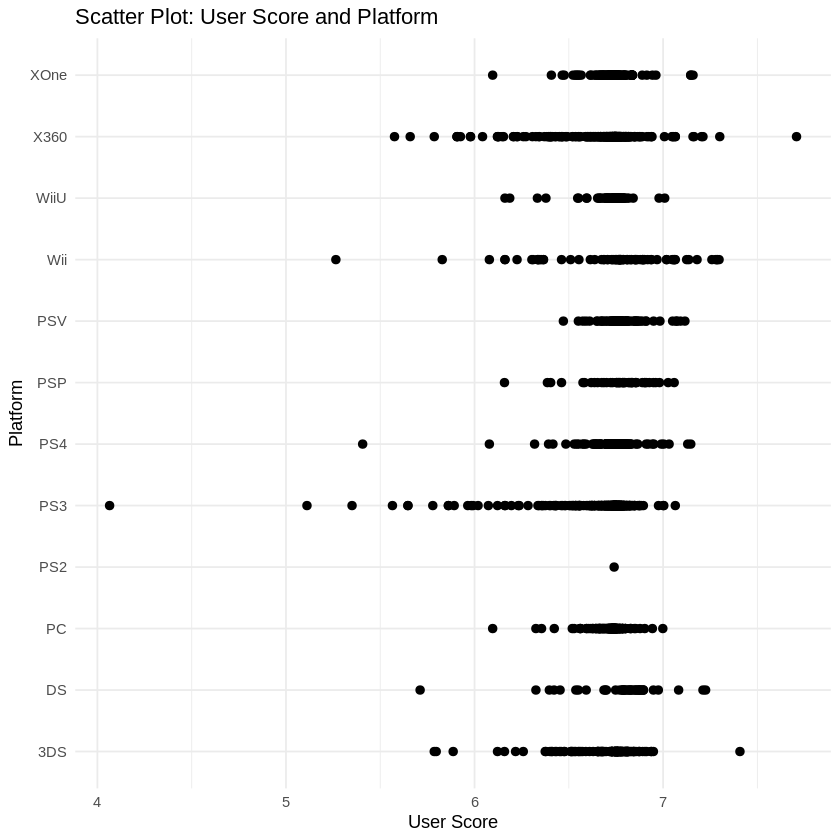

In [ ]:
# Create a scatter plot comparing User Score and Platform
scatter_plot <- ggplot(na_df, aes(x = USER_SCORE, y = PLATFORM)) +
  geom_point(size = 2) +
  labs(title = "Scatter Plot: User Score and Platform",
       x = "User Score",
       y = "Platform") +
  theme_minimal()
scatter_plot

Check for patterns between Genre and Crime rate

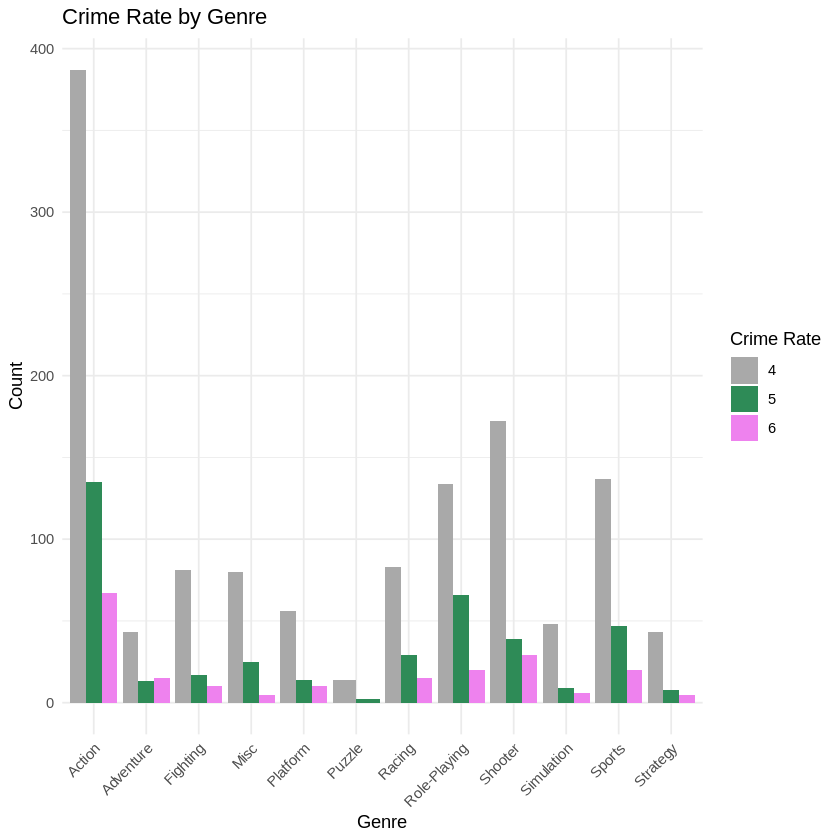

In [ ]:
# Custom colors for crime rate categories
crime_colors <- c("4" = "darkgrey",
                  "5" = "seagreen",
                  "6" = "violet",
                  "7" = "tomato")

# Layered bar chart for CRIME_RT and GENRE
genre_crime_plot <- ggplot(na_df, aes(x = GENRE, fill = factor(CRIME_RT))) +
  geom_bar(position = "dodge", stat = "count") +
  scale_fill_manual(values = crime_colors) +
  labs(title = "Crime Rate by Genre",
       x = "Genre",
       y = "Count",
       fill = "Crime Rate") +
  theme_minimal()+
   theme(axis.text.x = element_text(angle = 45, hjust = 1))
 genre_crime_plot

####Identify correlation between our numerical predictor using a "Pairwise Correlation Matrix"

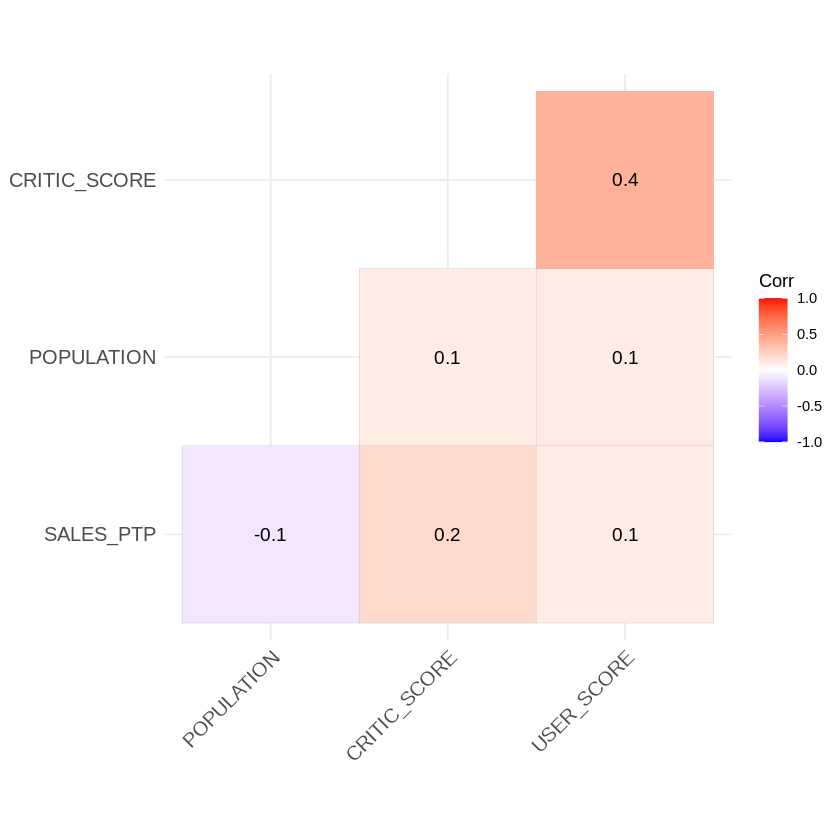

In [ ]:
# Filter and select the numerical variables for pairwise correlation
pairwise_df <- na_df %>%
  select (POPULATION, SALES_PTP, CRITIC_SCORE,USER_SCORE)

# compute a matrix of correlation p-values
p.mat <- cor_pmat(pairwise_df)

# compute a correlation matrix
corr <- round(cor(pairwise_df),1)

# Argument p.mat indicates the no significant correlation coefficient
# Visualize the Correlation Matrix
ggcorrplot(corr, hc.order = TRUE, type = "lower",lab = TRUE, p.mat= p.mat)

## Predictive Modelling
*This section uses the list of predictors included in the tidy dataframe to predict crime rate using several ML algorithms from the 'caret' and 'randomForest' package.*

####Apply a **"Z-Transformation"** to our numerical variables to avoid bias in our data values due to a different scale

In [ ]:
# First assess the structure of the df,
# columns that are numeric are 1, 6,7, and 8.
# We need to scale these data with a z-transformation
str(na_df)

'data.frame':	1884 obs. of  8 variables:
 $ POPULATION  : num  4.62e+08 4.71e+08 4.71e+08 4.62e+08 4.67e+08 ...
 $ CRIME_RT    : Factor w/ 4 levels "2","4","5","6": 2 2 2 2 2 2 2 2 2 2 ...
 $ PLATFORM    : Factor w/ 12 levels "3DS","DS","PC",..: 2 11 11 3 1 11 11 9 11 1 ...
 $ GENRE       : Factor w/ 12 levels "Action","Adventure",..: 12 9 11 9 8 1 4 11 8 1 ...
 $ GM_TYPE     : Factor w/ 4 levels "E","E10+","M",..: 2 3 1 3 4 2 2 1 3 2 ...
 $ SALES_PTP   : num  1.95 1.95 1.95 1.93 1.93 1.93 1.93 1.92 1.91 1.89 ...
 $ CRITIC_SCORE: num  72.4 71.5 72.1 72.1 72.1 ...
 $ USER_SCORE  : num  6.8 6.73 6.72 6.74 6.74 ...


In [ ]:
# Subset and transform the data into a proper format for machine learning
# CRIME_RT, GENRE, SALES_PTP, CRITIC_SCORE, USER_SCORE, GM_TYPE, PLATFORM
ml_df <- na_df %>%
  mutate(across(c(6:8), ~ as.vector(scale(.)), .names = "{.col}_z")) %>%
  select(c(2:5, 9:11)) %>%
  # rename the new columns to remove "_z"
  rename("SALES_PTP" = "SALES_PTP_z", "CRITIC_SCORE" = "CRITIC_SCORE_z", "USER_SCORE" = "USER_SCORE_z")

str(ml_df)

'data.frame':	1884 obs. of  7 variables:
 $ CRIME_RT    : Factor w/ 4 levels "2","4","5","6": 2 2 2 2 2 2 2 2 2 2 ...
 $ PLATFORM    : Factor w/ 12 levels "3DS","DS","PC",..: 2 11 11 3 1 11 11 9 11 1 ...
 $ GENRE       : Factor w/ 12 levels "Action","Adventure",..: 12 9 11 9 8 1 4 11 8 1 ...
 $ GM_TYPE     : Factor w/ 4 levels "E","E10+","M",..: 2 3 1 3 4 2 2 1 3 2 ...
 $ SALES_PTP   : num  3.34 3.34 3.34 3.3 3.3 ...
 $ CRITIC_SCORE: num  0.614 0.301 0.52 0.506 0.505 ...
 $ USER_SCORE  : num  0.4577 0.1159 0.0535 0.1444 0.1738 ...


####Inspect the Data Distribution of Our Target Variable ("CRIME_RT")

In [ ]:
# Level "2" should not exist because it has zero count
summary(ml_df$CRIME_RT)

2    4    5    6 
   0 1278  404  202

In [ ]:
# double confirm that it's a factor
ml_df$CRIME_RT <- as.factor(ml_df$CRIME_RT)
# drop level = 2
ml_df$CRIME_RT <- droplevels(ml_df$CRIME_RT, exclude = "2")
# Check and confirm that level '2' is removed
summary(ml_df$CRIME_RT)

4    5    6 
1278  404  202

In [ ]:
# Grab the minimum number (for rebalance classes)
crime_levels <- as.numeric(as.character(ml_df$CRIME_RT))
crime_levels <- table(crime_levels)
min_quantity <- min(crime_levels)
min_quantity

[1] 202

####Get a balanced dataset with an even number of observations

In [ ]:
# Create a dataset with balanced target variable
# randomly select n samples from each level
# where n is the lowest quantity in a particular level

balanced_df <- ml_df %>%
  filter(CRIME_RT %in% c("4", "5", "6")) %>%
  group_by(CRIME_RT) %>%
  # min_quantity is used to get an even number of samples for each class
  sample_n(min_quantity) %>%
  ungroup()

str(balanced_df)

tibble [606 × 7] (S3: tbl_df/tbl/data.frame)
 $ CRIME_RT    : Factor w/ 3 levels "4","5","6": 1 1 1 1 1 1 1 1 1 1 ...
 $ PLATFORM    : Factor w/ 12 levels "3DS","DS","PC",..: 3 3 5 7 3 8 4 5 11 1 ...
 $ GENRE       : Factor w/ 12 levels "Action","Adventure",..: 8 9 9 3 3 1 1 1 8 8 ...
 $ GM_TYPE     : Factor w/ 4 levels "E","E10+","M",..: 4 3 3 4 4 2 3 3 3 3 ...
 $ SALES_PTP   : num [1:606] -0.5618 -0.0136 -0.6934 -0.4083 -0.9346 ...
 $ CRITIC_SCORE: num [1:606] 0.219 0.555 -0.648 -0.168 0.978 ...
 $ USER_SCORE  : num [1:606] 0.0646 0.1582 -0.7727 1.3777 0.1043 ...


#### Create Training and Test Datasets

In [ ]:
# Create a 70/30 split
inTraining <- createDataPartition(balanced_df$CRIME_RT, p=0.70, list=FALSE)
training <- balanced_df[inTraining,]
validation <- balanced_df[-inTraining,]

# Preset modelling parameters
# Set up a 10-fold cross validation, using Accuracy as a performance metric
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

# verify the size of our training & validation dataset
cat("Percentage of Training Data:", nrow(training) / nrow(balanced_df) * 100, "%\n")
cat("Percentage of Validation Data:", nrow(validation) / nrow(balanced_df) * 100, "%\n")

Percentage of Training Data: 70.29703 %
Percentage of Validation Data: 29.70297 %


#### Chooisng ML Models:

*   Random Forest
*   Classification and Regression Trees
*   k-Nearest Neighbors
*   "lda" and "glm" are not suitable (already examined)



In [ ]:
### Random Forest (rf) ###

# Set seed for reproducibility
set.seed(123)
# Train the random forest model
fit.rf <- train(CRIME_RT~., data=training, method="rf", metric=metric, trControl=control)
rf_pred <- predict(fit.rf, validation)

# Get confusion matrix
rf_cm <- confusionMatrix(rf_pred, as.factor(validation$CRIME_RT))
rf_cm

Confusion Matrix and Statistics

          Reference
Prediction  4  5  6
         4 47 14  3
         5  6 11 11
         6  7 35 46

Overall Statistics
                                          
               Accuracy : 0.5778          
                 95% CI : (0.5021, 0.6509)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.597e-11       
                                          
                  Kappa : 0.3667          
                                          
 Mcnemar's Test P-Value : 0.0006068       

Statistics by Class:

                     Class: 4 Class: 5 Class: 6
Sensitivity            0.7833  0.18333   0.7667
Specificity            0.8583  0.85833   0.6500
Pos Pred Value         0.7344  0.39286   0.5227
Neg Pred Value         0.8879  0.67763   0.8478
Prevalence             0.3333  0.33333   0.3333
Detection Rate         0.2611  0.06111   0.2556
Detection Prevalence   0.3556  0.15556   0.4889
Balanced Accuracy      0.8208  0.52083   0.7083

In [ ]:
### Classification and Regression Trees (cart) ###
set.seed(123)
fit.cart <- train(CRIME_RT~., data=training, method="rpart", metric=metric, trControl=control)
cart_pred <- predict(fit.cart, validation)
cart_cm <- confusionMatrix(cart_pred, as.factor(validation$CRIME_RT))
cart_cm

Confusion Matrix and Statistics

          Reference
Prediction  4  5  6
         4 51 31 17
         5  0  0  0
         6  9 29 43

Overall Statistics
                                          
               Accuracy : 0.5222          
                 95% CI : (0.4466, 0.5971)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.396e-07       
                                          
                  Kappa : 0.2833          
                                          
 Mcnemar's Test P-Value : 1.751e-13       

Statistics by Class:

                     Class: 4 Class: 5 Class: 6
Sensitivity            0.8500   0.0000   0.7167
Specificity            0.6000   1.0000   0.6833
Pos Pred Value         0.5152      NaN   0.5309
Neg Pred Value         0.8889   0.6667   0.8283
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.2833   0.0000   0.2389
Detection Prevalence   0.5500   0.0000   0.4500
Balanced Accuracy      0.7250   0.5000   0.7000

In [ ]:
###  k-Nearest Neighbors (knn) ###
set.seed(123)
fit.knn <- train(CRIME_RT~., data=training, method="knn", metric=metric, trControl=control)
knn_pred <- predict(fit.knn, validation)
knn_cm <- confusionMatrix(knn_pred, as.factor(validation$CRIME_RT))
knn_cm

Confusion Matrix and Statistics

          Reference
Prediction  4  5  6
         4 43 14  6
         5 10 20 17
         6  7 26 37

Overall Statistics
                                          
               Accuracy : 0.5556          
                 95% CI : (0.4798, 0.6295)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 7.833e-10       
                                          
                  Kappa : 0.3333          
                                          
 Mcnemar's Test P-Value : 0.4527          

Statistics by Class:

                     Class: 4 Class: 5 Class: 6
Sensitivity            0.7167   0.3333   0.6167
Specificity            0.8333   0.7750   0.7250
Pos Pred Value         0.6825   0.4255   0.5286
Neg Pred Value         0.8547   0.6992   0.7909
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.2389   0.1111   0.2056
Detection Prevalence   0.3500   0.2611   0.3889
Balanced Accuracy      0.7750   0.5542   0.6708

## Evaluation of Results

*Before summarizing and visualizing the performance metrics, we've acknowledged that the "Random Forest" stands out as our strongest model, providing a relatively good accuracy of 0.61—surpassing our baseline accuracy of 0.55, albeit falling short of our target score of 0.70 or higher. The confusion matrices generated by the random forest model consistently demonstrate accuracy within the 95% confidence level (0.55, 0.70). Copen's Kappa value has consistently hovered around 0.45, with a consistently low p-value (< 0.05) and an balanced accuracy score of about 0.72. We have confidence that our new model, built on the random forest algorithm, holds potential for predicting future crime rates based on various gaming statistics in a new dataset. The subsequent section will concentrate on visualizing the outcomes of the predictive modeling process, shedding light on which predictors play the most significant roles.*




#### Asssesing Model Performance and Accuracies

In [ ]:
# summary of results
results <- resamples(list(rf = fit.rf, cart=fit.cart, knn=fit.knn))
results <-  as.data.frame(results)
summary(results)

# Interpretation: rf has the highest potential to reach a strong accuracy score, and it has the highest mean and min accuracy among all

       rf              cart             knn           Resample        
 Min.   :0.5476   Min.   :0.4186   Min.   :0.4762   Length:10         
 1st Qu.:0.5872   1st Qu.:0.5087   1st Qu.:0.5324   Class :character  
 Median :0.6395   Median :0.5529   Median :0.5648   Mode  :character  
 Mean   :0.6314   Mean   :0.5352   Mean   :0.5699                     
 3rd Qu.:0.6628   3rd Qu.:0.5681   3rd Qu.:0.5814                     
 Max.   :0.7143   Max.   :0.5814   Max.   :0.6744                     

Using Resample as id variables



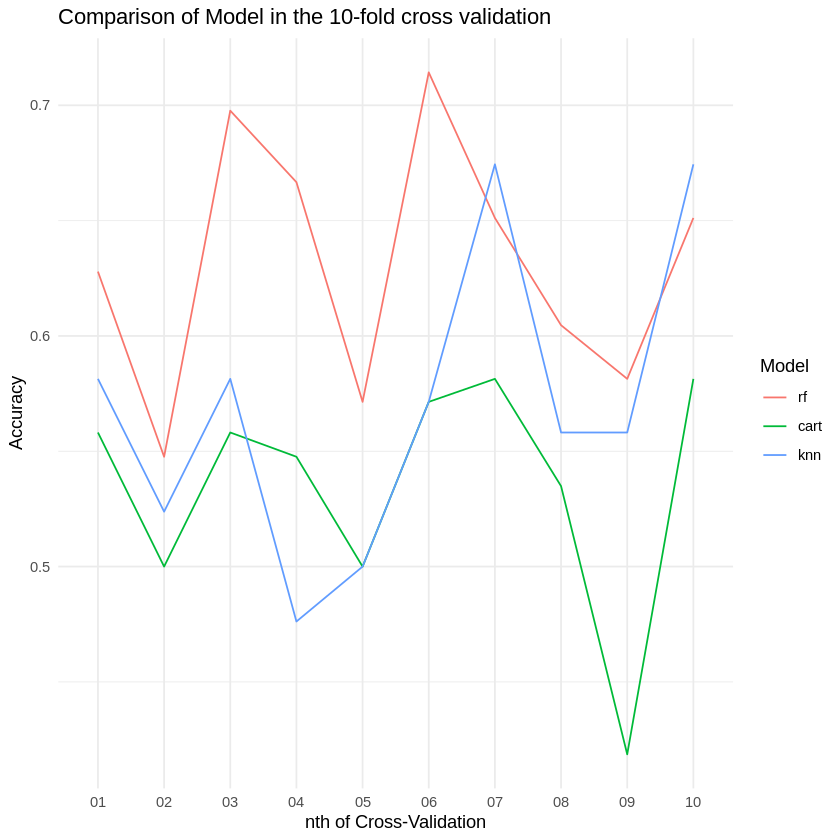

In [ ]:
results_long <- reshape2::melt(results)
results_long <- results_long %>%
  rename(Accuracy = value, Model = variable) %>%
  # change Fold01 to 01 of the cross-validation process
  mutate(Resample = gsub("Fold([0-9]+)", "\\1", Resample))

# visualize the different accuracy scores from the cross-fold validation process
result_cv_plot <- ggplot(results_long, aes(x = Resample, y = Accuracy, group = Model, color = Model)) +
  geom_line() +  # Use geom_line() instead of geom_boxplot()
  labs(title = "Comparison of Model in the 10-fold cross validation",
       x = "nth of Cross-Validation",
       y = "Accuracy") +
  theme_minimal()

result_cv_plot

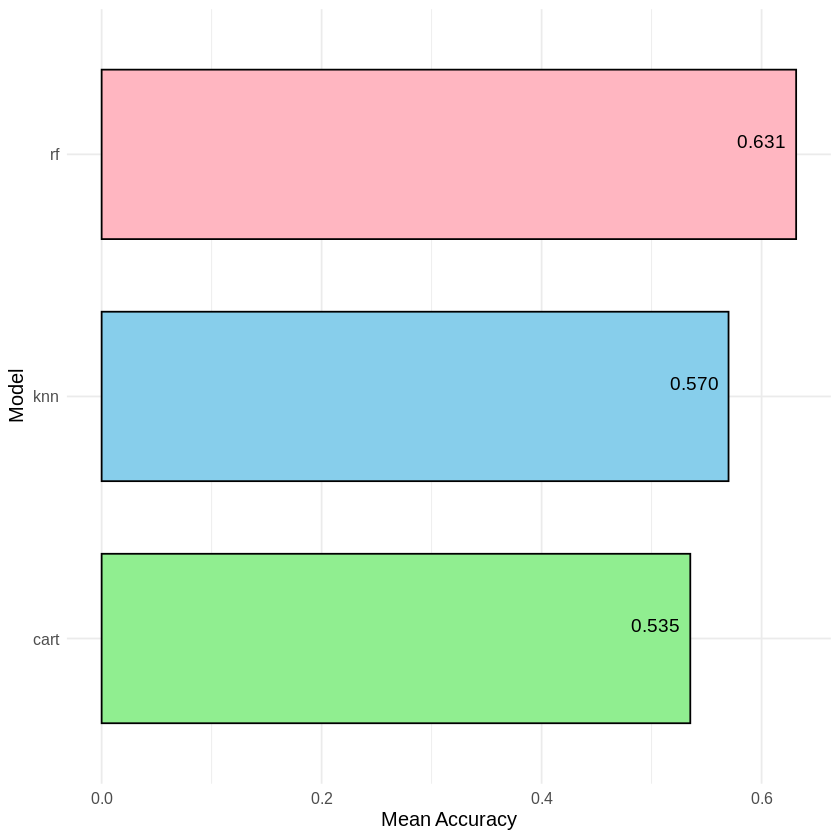

In [ ]:
# clean the df so that each model has a mean accuracy
clean_results <- results %>%
  pivot_longer(names_to = "Model", values_to = "Accuracy", -Resample) %>%
  group_by(Model) %>%
  summarise(Mean_Accuracy = mean(Accuracy))

# Create a graph to compare the results visually
mean_acc_graph <- clean_results %>%
  ggplot(aes(x = fct_reorder(Model, Mean_Accuracy), y = Mean_Accuracy, fill = Model)) +
  geom_bar(stat = "identity", width = 0.7, color = "black") +
  geom_text(aes(label = sprintf("%.3f", Mean_Accuracy)),
            vjust = -0.5, hjust = 1.2, size = 4) +
  scale_fill_manual(values = c(rf = "#FFB6C1", cart = "#90EE90", knn = "#87CEEB")) +
  coord_flip() +
  xlab("Model") +
  ylab("Mean Accuracy") +
  theme_minimal() +
  theme(
    text = element_text(size = 12),
    axis.title = element_text(size = 12),
    legend.position = "none"
  )
mean_acc_graph

#### Assess Variable Importance

In [ ]:
# All models seem to be performing poorly except random forest
# we will only be using the stats from fit.rf to gain more insights about our predictors
fit.rf

Random Forest 

426 samples
  6 predictor
  3 classes: '4', '5', '6' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 383, 384, 383, 384, 384, 384, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.6313953  0.4467584
  15    0.5868771  0.3800332
  28    0.5822259  0.3728030

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

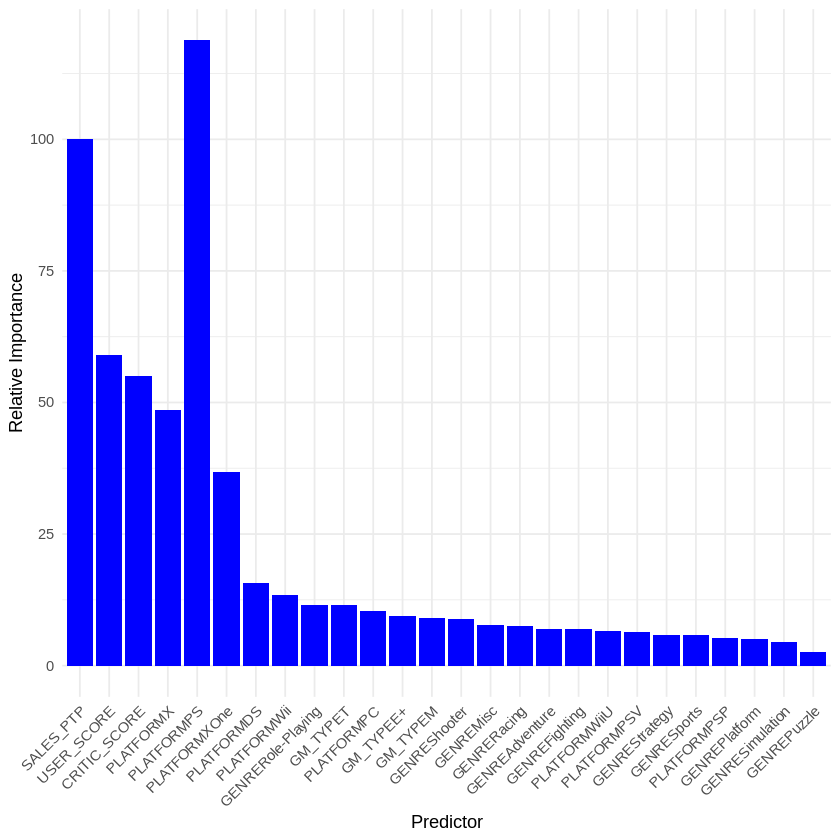

In [ ]:
# Get variable importance
rf_VarImp <- varImp(fit.rf)$importance

# Reshape the data into two columns
rf_VarImp <- rf_VarImp %>%
  rownames_to_column(var = "Predictor") %>%
  mutate(Predictor = gsub("\\d+\\.?\\d*", "", Predictor))%>%
  rename(Importance = Overall) %>%
  mutate(Importance = round(Importance, 1)) %>%
  arrange(desc(Importance))

# plot the data
rf_importance_chart <- ggplot(rf_VarImp, aes(x = reorder(Predictor, desc(Importance)), y = Importance)) +
  geom_bar(stat = "identity", fill = "blue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Predictor", y = "Relative Importance")

rf_importance_chart

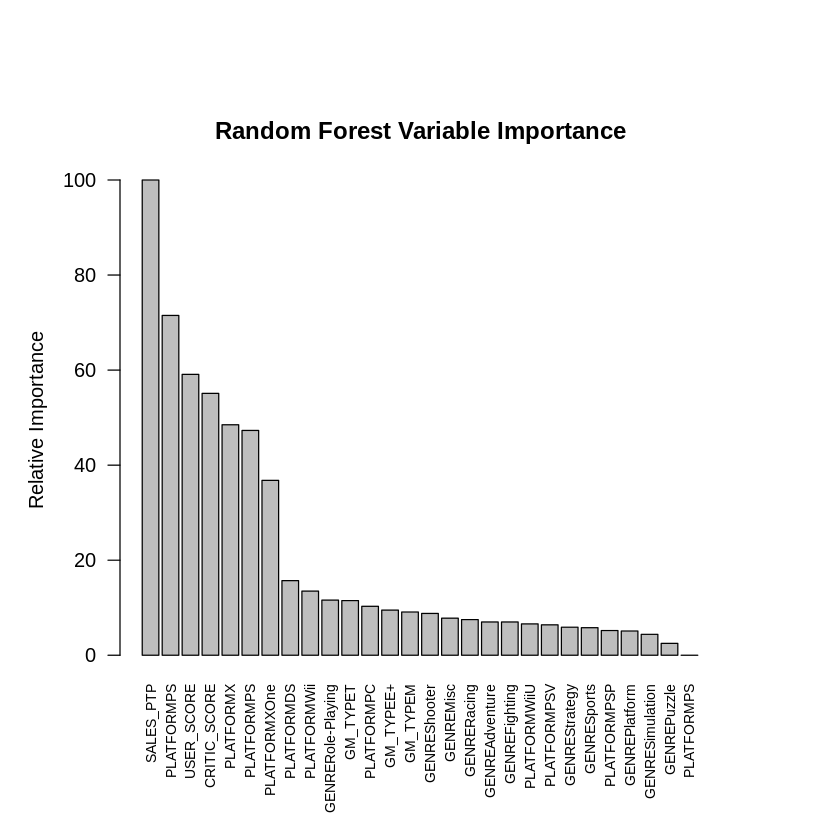

In [ ]:
# random forest variable importance plot with ggplot2 looks weird
# try the barplot () function from base-R instead

# Set graphical parameters to control the width and height of the plotting
par(pin = c(5, 4))

# Plot the data using barplot with default colors
barplot(rf_VarImp$Importance,
        names.arg = rf_VarImp$Predictor,
        las = 2,  # Rotate x-axis labels
        cex.names = 0.7,  # Adjust font size
        main = "Random Forest Variable Importance",
        xlab = " ",
        ylab = "Relative Importance")

# Reset to default values
par(pin = c(7, 7))

## Conclusion

*In summary, our team has successfully devised a model for forecasting crime rates based on video gaming statistics. We explored the capabilities of five distinct machine learning algorithms to capture the intricate relationship between various gaming metrics that may influence changes in crime rates. The accuracy of each model was assessed through a ten-fold cross-validation process, utilizing performance metrics such as sensitivity, specificity, and Cohen's Kappa. Our analysis revealed that the "Random Forest" model stands out as the top-performing choice (mean accuracy = 0.61), despite its significantly higher computational demands. In terms of identifying predictors crucial for constructing a robust model, we identified that "User_Score" (game rating provided by players), "Critic_Score" (game rating from professional critics), and "Sales_PTP" (sales per thousand people) are the most pivotal factors. Surprisingly, "GM_Type" did not wield the expected level of influence. We acknowledge that this is not a perfect model and there are lots of room for improvement. Several improvements we have already identified include adjusting the IQR range for outlier detection, applying a log transformation to reduce skewness in our predictors, and fine tuning parameters for the random forest model to see if removing several predictors can be more beneficial.*
